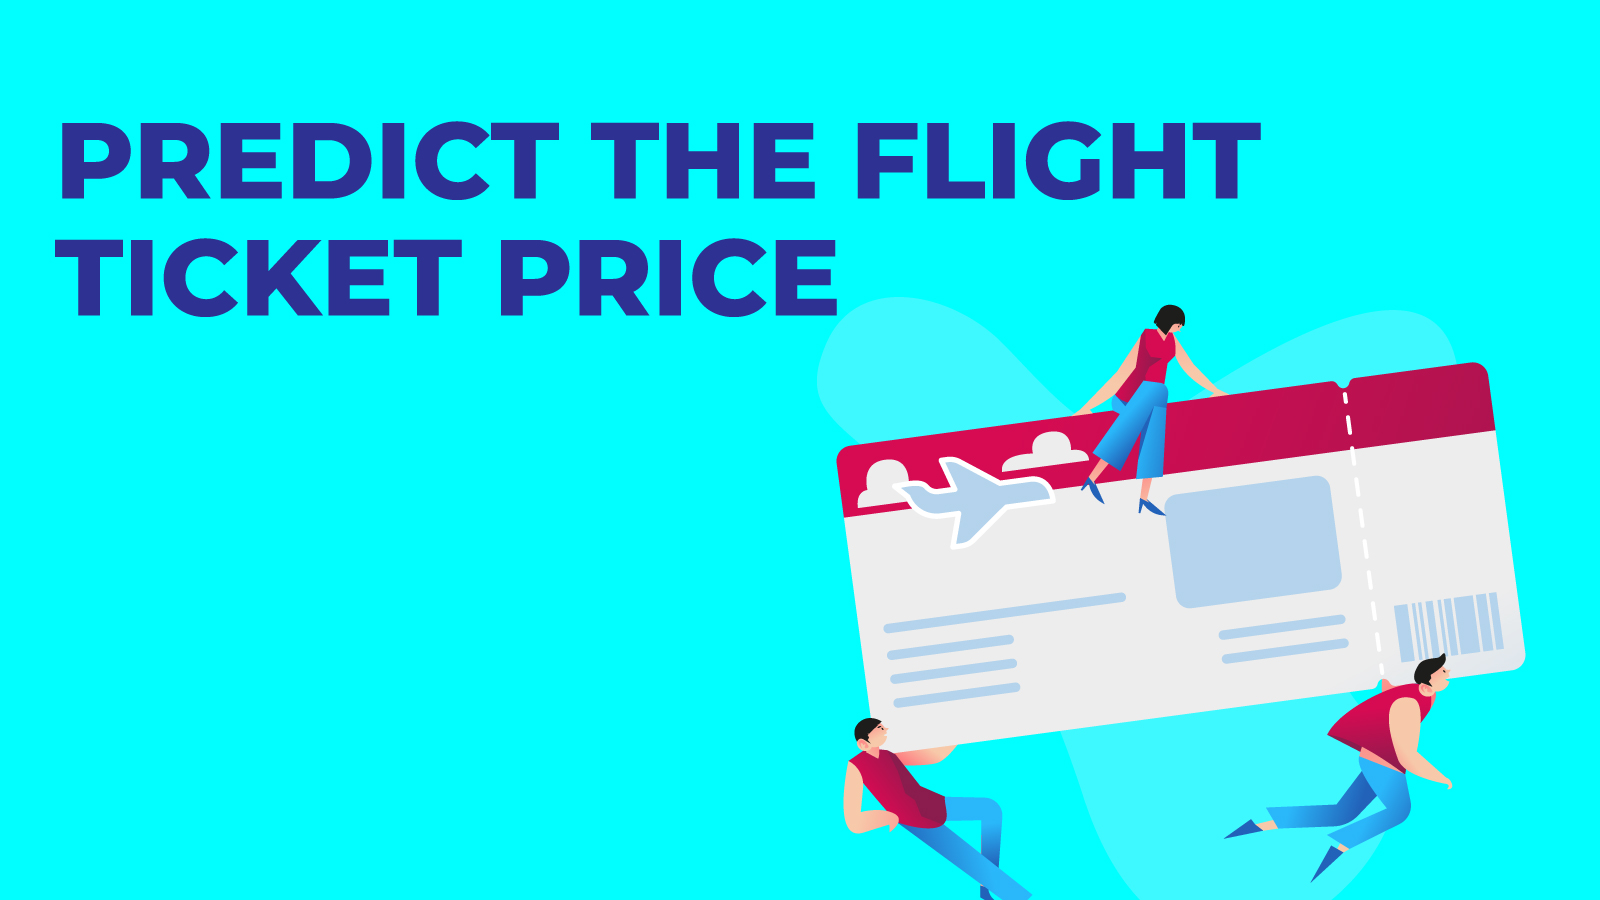



*   Problem Statement : Predict prices of Ticket Flight
*   Details Dataset   : Prices of flight tickets for various airlines March - June of 2019 and between various cities.
*   Dataset Size      : Size of training set: 10683 records Size of test set: 2671 records
*   Features          :


1.   Airline: The name of the airline. 
2.   Date_of_Journey: The date of the journey 
3.   Source: The source from which the service begins. 








In [21]:
!pip install h2o

     |████████████████████████████████| 176.2 MB 80 kB/s 
  Created wheel for h2o: filename=h2o-3.36.0.3-py2.py3-none-any.whl size=176244303 sha256=832a2ac5ec5484d6a3fde3cf264a13aa23f31a15fc1bc379e1c3e486d396c7ac
  Stored in directory: /root/.cache/pip/wheels/b5/71/a5/02087a05e5644158183e1c58eeae3f9356a4d1e80659fb2dfb
Successfully built h2o


In [3]:
!pip install dabl

     |████████████████████████████████| 558 kB 5.1 MB/s 


## Import Library & Load Dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dabl import plot

/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


In [5]:
train = pd.read_excel("/content/Data_Train.xlsx")
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
test = pd.read_excel("/content/Test_set.xlsx")
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


## Exploratory data Analysis

/usr/local/lib/python3.7/dist-packages/dabl/plot/supervised.py:548: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  FutureWarning)


Target looks like classification


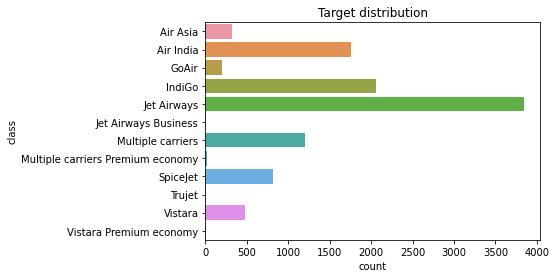

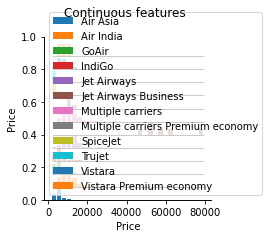

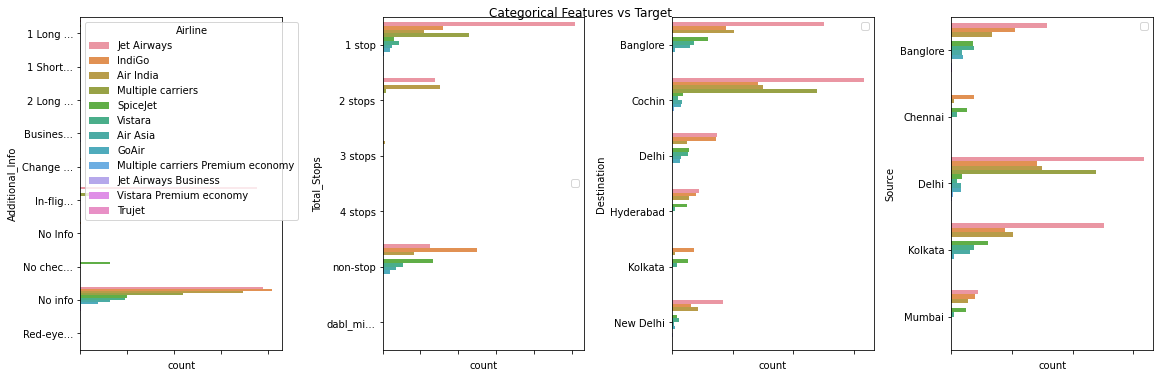

In [7]:
plot(train,'Airline')
plt.show()

/usr/local/lib/python3.7/dist-packages/dabl/plot/supervised.py:548: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  FutureWarning)


Target looks like regression


/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 16 outliers in column Price.
  int(dropped), series.name), UserWarning)


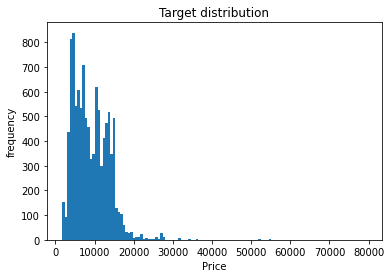

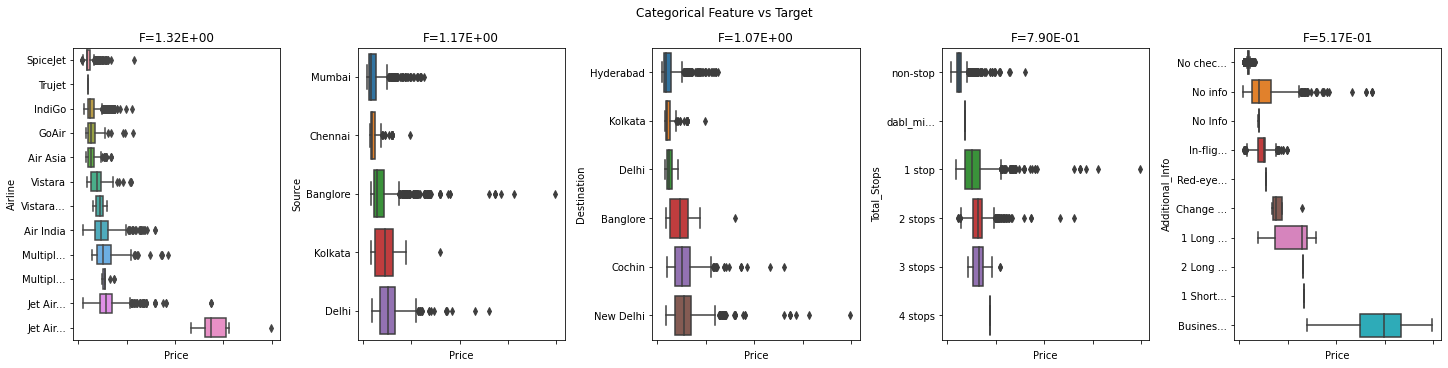

In [8]:
plot(train,'Price')
plt.show()

/usr/local/lib/python3.7/dist-packages/dabl/plot/supervised.py:548: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  FutureWarning)


Target looks like classification


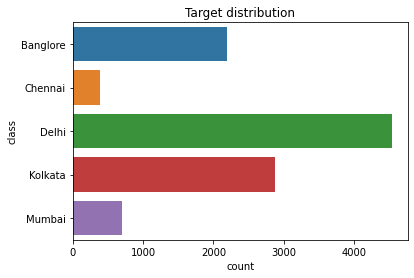

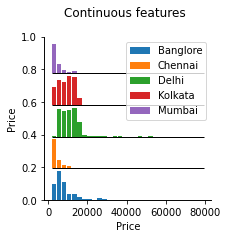

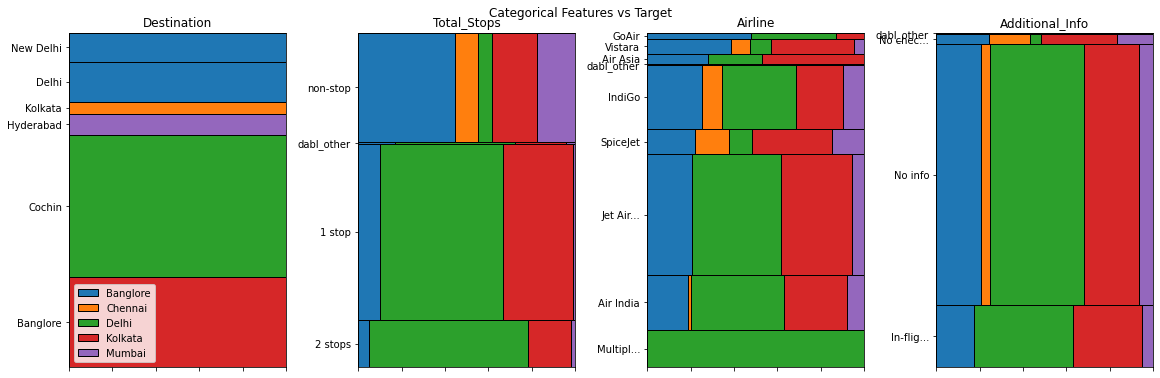

In [9]:
plot(train,'Source')
plt.show()

/usr/local/lib/python3.7/dist-packages/dabl/plot/supervised.py:548: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  FutureWarning)


Target looks like classification


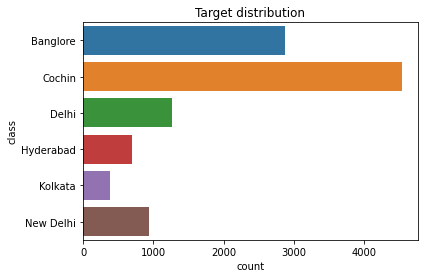

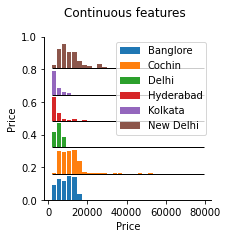

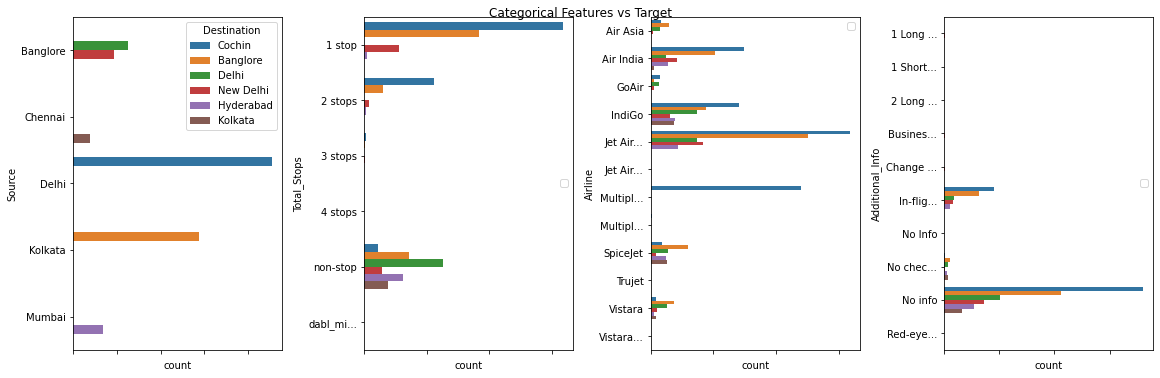

In [10]:
plot(train,'Destination')
plt.show()

## Data Cleaning

### Train Data

In [13]:
# Deleted column Date_of_Journey from train
train.drop(['Date_of_Journey'], axis=1, inplace=True)

# Deleted column Duration from train
train.drop(['Duration'], axis=1, inplace=True)

# Deleted column Arrival_Time from train
train.drop(['Arrival_Time'], axis=1, inplace=True)

# Changed Price from int64 to float
train['Price'] = train['Price'].astype('float')
train.head()


,Airline,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,Price
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,non-stop,No info,3897.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2 stops,No info,7662.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2 stops,No info,13882.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,1 stop,No info,6218.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,1 stop,No info,13302.0


In [14]:
train[['Stops','add']] = train['Total_Stops'].str.split(" ",expand=True)
train = train.drop(columns= ['add'])
train['Stops'] = train['Stops'].str.replace("non-stop","0")
train = train.drop(columns= ['Total_Stops'])
train.head()

,Airline,Source,Destination,Route,Dep_Time,Additional_Info,Price,Stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,No info,3897.0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,No info,7662.0,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,No info,13882.0,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,No info,6218.0,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,No info,13302.0,1


In [15]:
train.to_csv("C:\\Users\\Lulus\\Deck\\Desktop\\MachineHack\\Flight_Ticket_Participant_Datasets\\train_csv.csv")

### Test data

In [16]:
# Changed Date_of_Journey from object to datetime
test['Date_of_Journey'] = pd.to_datetime(test['Date_of_Journey'], format='%m/%d/%Y', errors='coerce')

# Deleted column Date_of_Journey from test
test.drop(['Date_of_Journey'], axis=1, inplace=True)

# Deleted column Duration from test
test.drop(['Duration'], axis=1, inplace=True)

# Deleted column Arrival_Time from test
test.drop(['Arrival_Time'], axis=1, inplace=True)
test.head()

,Airline,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,1 stop,No info
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,1 stop,No info
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,1 stop,In-flight meal not included
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,1 stop,No info
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,non-stop,No info


In [17]:
test[['Stops','add']] = test['Total_Stops'].str.split(" ",expand=True)
test = test.drop(columns= ['add'])
test['Stops'] = test['Stops'].str.replace("non-stop","0")
test = test.drop(columns= ['Total_Stops'])
test.head()

,Airline,Source,Destination,Route,Dep_Time,Additional_Info,Stops
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,No info,1
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,No info,1
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,In-flight meal not included,1
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,No info,1
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,No info,0


In [18]:
test.to_csv("C:\\Users\\Lulus\\Deck\\Desktop\\MachineHack\\Flight_Ticket_Participant_Datasets\\test_csv.csv")

## Train Model

In [22]:
import h2o
from h2o.automl import H2OAutoML


# Start the H2O cluster (locally)
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.14" 2022-01-18; OpenJDK Runtime Environment (build 11.0.14+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.14+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmprzoh8fi9
  JVM stdout: /tmp/tmprzoh8fi9/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmprzoh8fi9/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.3
H2O_cluster_version_age:,1 month and 9 days
H2O_cluster_name:,H2O_from_python_unknownUser_ui4e02
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [23]:
# Import a sample binary outcome train/test set into H2O
train = h2o.import_file("C:\\Users\\Lulus\\Deck\\Desktop\\MachineHack\\Flight_Ticket_Participant_Datasets\\train_csv.csv")
test = h2o.import_file("C:\\Users\\Lulus\\Deck\\Desktop\\MachineHack\\Flight_Ticket_Participant_Datasets\\test_csv.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [24]:
# Identify predictors and response
x = train.columns
y = "Price"
x.remove(y)

In [27]:
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_5_AutoML_2_20220326_164430

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 3681776.4467453547
RMSE: 1918.795571900601
MAE: 1142.575136563195
RMSLE: 0.18183018315237182
R^2: 0.8254441274874895
Mean Residual Deviance: 3681776.4467453547
Null degrees of freedom: 10043
Residual degrees of freedom: 10039
Null deviance: 211850919177.83386
Residual deviance: 36979762631.110344
AIC: 180369.92835328373

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 4846237.14133705
RMSE: 2201.417075734866
MAE: 1275.6310051412383
RMSLE: 0.20474552039080554
R^2: 0.7720773859290155
Mean Residual Deviance: 4846237.14133705
Null degrees of freedom: 10682
Residual degrees of freedom: 10678
Null deviance: 22716178445

In [28]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_BestOfFamily_5_AutoML_2_20220326_164430,4.84624e+06,2201.42,4.84624e+06,1275.63,0.204746
StackedEnsemble_AllModels_7_AutoML_2_20220326_164430,4.8472e+06,2201.64,4.8472e+06,1274.66,0.204558
StackedEnsemble_AllModels_4_AutoML_2_20220326_164430,4.85196e+06,2202.72,4.85196e+06,1272.06,0.204459
StackedEnsemble_AllModels_2_AutoML_2_20220326_164430,4.87567e+06,2208.09,4.87567e+06,1279.04,0.205562
StackedEnsemble_BestOfFamily_8_AutoML_2_20220326_164430,4.87575e+06,2208.11,4.87575e+06,1284.4,0.205653
StackedEnsemble_BestOfFamily_4_AutoML_2_20220326_164430,4.87741e+06,2208.49,4.87741e+06,1284.44,0.205533
StackedEnsemble_AllModels_3_AutoML_2_20220326_164430,4.88219e+06,2209.57,4.88219e+06,1281.39,0.205499
StackedEnsemble_BestOfFamily_3_AutoML_2_20220326_164430,4.89424e+06,2212.29,4.89424e+06,1283.47,0.205714
GBM_grid_1_AutoML_2_20220326_164430_model_2,4.9761e+06,2230.72,4.9761e+06,1294.66,0.206997
StackedEnsemble_AllModels_1_AutoML_2_20220326_164430,4.99193e+06,2234.26,4.99193e+06,1278.16,0.206608


## The Best Model

In [29]:
# The leader model is stored here
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_5_AutoML_2_20220326_164430

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 3681776.4467453547
RMSE: 1918.795571900601
MAE: 1142.575136563195
RMSLE: 0.18183018315237182
R^2: 0.8254441274874895
Mean Residual Deviance: 3681776.4467453547
Null degrees of freedom: 10043
Residual degrees of freedom: 10039
Null deviance: 211850919177.83386
Residual deviance: 36979762631.110344
AIC: 180369.92835328373

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 4846237.14133705
RMSE: 2201.417075734866
MAE: 1275.6310051412383
RMSLE: 0.20474552039080554
R^2: 0.7720773859290155
Mean Residual Deviance: 4846237.14133705
Null degrees of freedom: 10682
Residual degrees of freedom: 10678
Null deviance: 227161784458.47144
Residual deviance: 51772351380.9037
AIC: 194780.07790416625


## Make Prediction

In [30]:
preds = aml.leader.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.7/dist-packages/h2o/job.py:83: UserWarning: Test/Validation dataset column 'Route' has levels not trained on: ["BLR → TRV → DEL", "BOM → IXC → DEL → HYD", "BOM → VGA → TIR → HYD", "CCU → IXR → BBI → BOM → BLR"]
  warnings.warn(w)
/usr/local/lib/python3.7/dist-packages/h2o/job.py:83: UserWarning: Test/Validation dataset column 'Dep_Time' has levels not trained on: ["22:30"]
  warnings.warn(w)


In [31]:
preds.columns=['Price'] 

In [32]:
preds.head()

Price
14726.2
4400.15
11056.3
12642.6
4245.21
10811.5
9122.37
4903.98
4688.6
14083.2


## Create Submission


In [33]:
submission = preds.as_data_frame(use_pandas=True)

In [34]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   2671 non-null   float64
dtypes: float64(1)
memory usage: 21.0 KB


In [35]:
submission.to_csv("C:\\Users\\Lulus\\Deck\\Desktop\\MachineHack\\Flight_Ticket_Participant_Datasets\\submission.csv")